In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
"""
functions that display an array
"""
PADDING = 1

symbolic_list = [[9,2,6,8,5,3,9,5,4,3],
       [5,8,4,1,7,6,1,2,1,6],
       [0,3,5,8,0,4,7,0,3,5],
       [4,7,6,2,6,9,5,1,7,4],
       [1,8,0,3,0,4,2,0,0,2],
       [0,0,0,0,0,0,0,0,0,0],
       [0,1,2,3,4,5,6,7,8,9],
       [0,1,2,3,4,5,6,7,8,9],
       [0,1,2,3,4,5,6,7,8,9],
       [0,1,2,3,4,5,6,7,8,9]]

In [2]:
color_dict = {
    -1: (255, 255, 255),
    0: (0, 0, 0), 
    1: (0, 105, 207),
    2: (255, 57, 55),
    3: (0, 197, 67),
    4: (255, 215, 49),
    5: (160, 160, 160),
    6: (249, 22, 179),
    7: (255, 122, 44),
    8: (99, 214, 252),
    9: (130, 15, 35)
}

def convert_row(row):
    return list(map(lambda x: color_dict[x], row))

def convert_to_color_array(symbolic_list):
    rgb_list = list(map(convert_row, symbolic_list))
    return np.array(rgb_list)
    
def display(arr):
    #for i in range(len(symbolic_list)):
        #plt.plot([-0.5, 9.5],[i + 0.5, i + 0.5], linewidth=1, color="white")
    
    #for i in range(len(symbolic_list[0])):
        #plt.plot([i + 0.5, i + 0.5], [-0.5, 9.5], linewidth=1, color="white")
        
    # plt.plot(6,2,marker='o', color="white")     
    plt.imshow(arr)

# display(convert_to_color_array(problem["train"][0]["input"]))

In [3]:
def place_side_by_side_with_padding(one, two, padding=PADDING):
    one_width = one.shape[1]
    one_height = one.shape[0]
    
    two_width = two.shape[1]
    two_height = two.shape[0]
    
    combined_image_height = max(one_height, two_height)
    combined_image_width = one_width + padding + two_width
    
    height_midpoint = combined_image_height // 2
    
    new_arr = np.zeros((combined_image_height, combined_image_width)) - 1
    
    one_x_start = 0
    one_x_end = one_x_start + one_width
    two_x_start = one_width + padding
    two_x_end = two_x_start + two_width
    
    one_y_start = height_midpoint - (one_height // 2)
    one_y_end = one_y_start + one_height
    two_y_start= height_midpoint - (two_height // 2)
    two_y_end = two_y_start + two_height
    
    new_arr[one_y_start:one_y_end,one_x_start:one_x_end] = one
    new_arr[two_y_start:two_y_end,two_x_start:two_x_end] = two
    
    return new_arr, two_x_start

In [4]:
def place_top_to_bottom(arr_list, align_list, padding=PADDING):
    combined_image_height = sum([arr.shape[0] for arr in arr_list]) + (len(arr_list) - 1)*padding
    combined_image_width = max(align_list) + max([arr.shape[1] - align for arr, align in zip(arr_list, align_list)])
    # first term is the left side, second term is the right side
    
    combined_arr = np.zeros((combined_image_height, combined_image_width)) - 1
    
    y_start = 0
    
    for arr, align in zip(arr_list, align_list):
        x_start = max(align_list) - align
        x_end = x_start + arr.shape[1]
        y_end = y_start + arr.shape[0]
        combined_arr[y_start:y_end,x_start:x_end] = arr
        
        y_start = y_end + padding
    
    return combined_arr

In [5]:
def make_half_array(problem, t):
    image_dict = {}

    image_list = []
    
    for demo in problem[t]:
        inp_image = np.array(demo["input"])
        out_image = np.array(demo["output"])

        new_arr, align = place_side_by_side_with_padding(inp_image, out_image, padding=PADDING)


        image_list.append({"demo": new_arr, "align": align})
    
    arr_list = [prob["demo"] for prob in image_list]
    align_list = [prob["align"] for prob in image_list]

    arr = place_top_to_bottom(arr_list, align_list)
    display(convert_to_color_array(arr))
    
    return arr

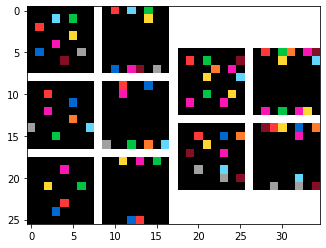

In [8]:
problem_path = "C:\\Users\\vicvi\\Desktop\\variations\\6ad5bdfd-2.json"
# problem_path ="C:\\Users\\vicvi\\OneDrive\\active\\analogy\\ARC_study\\ARC_Kaggle\\data\\sample_2\\6ad5bdfd.json"

with open(problem_path) as f:
    problem = json.load(f)

arr_train = make_half_array(problem, "train")
arr_test = make_half_array(problem, "test")

arr, _ = place_side_by_side_with_padding(arr_train, arr_test)
display(convert_to_color_array(arr))

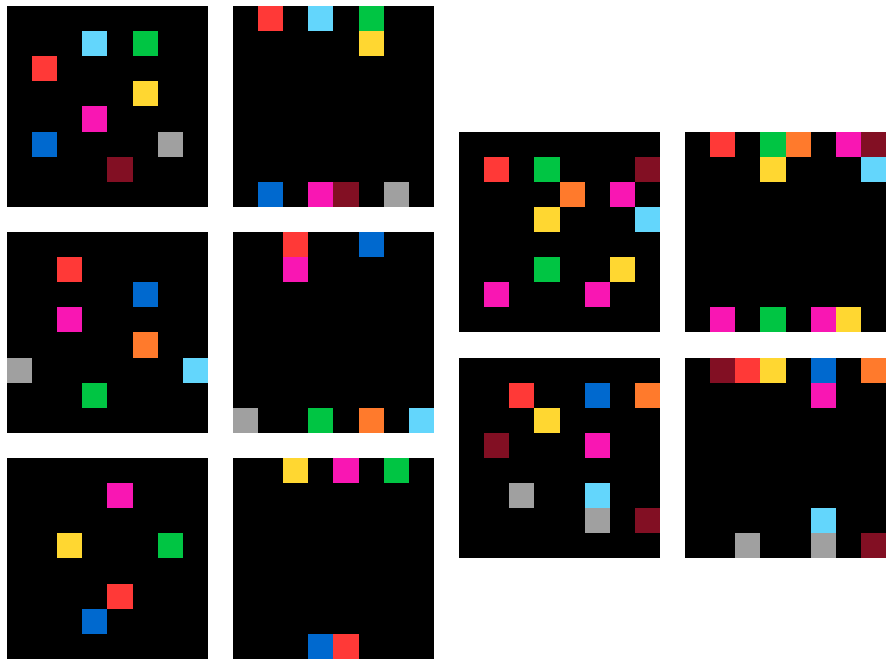

In [9]:
import os

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))
ax.imshow(convert_to_color_array(arr))
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

filename = os.path.basename(problem_path).split(".")[0]

plt.savefig(f"arc-case-figures/{filename}.svg")